In [ ]:
#import pandas as pd 
#import numpy as np
#import random
#import matplotlib
#import matplotlib.pyplot as plt
#import seaborn as sns
#from six.moves import cPickle as pickle

In [1]:
from matplotlib import rcParams
import seaborn as sns
from six.moves import cPickle as pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
rcParams['figure.figsize'] = 17.5, 10.5

In [5]:
import os
data_path="../data/original/pickles"

In [5]:
application_train = pickle.load(open(os.path.join(data_path, "application_train.csv.pickle"), "rb"))
application_test = pickle.load(open(os.path.join(data_path, "application_test.csv.pickle"), "rb"))

In [6]:
# Load prep_train and prep_test 
# data is already prepared with all 
data_path = './'
prep_train = pickle.load(open(os.path.join(data_path, "prep_train_with_domain_features.pkl"), "rb"))
prep_test = pickle.load(open(os.path.join(data_path, "prep_test_with_domain_features.pkl"), "rb"))

In [7]:
domain_features = ['DAYS_EMPLOYED_PERC', 'INCOME_CREDIT_PERC', 'INCOME_PER_PERSON', 'ANNUITY_INCOME_PERC', 
                  'PAYMENT_RATE', 'EXT_SOURCES_MEAN', 'EXT_SOURCES_PRODUCT', 'TARGET']

In [8]:
corr_ext_source_1 = prep_train.corr().EXT_SOURCE_1.sort_values()

In [11]:
corr_names = corr_ext_source_1[np.abs(corr_ext_source_1) >= 0.22]
corr_names = corr_names.drop(['EXT_SOURCE_1', 'EXT_SOURCES_PRODUCT', 'EXT_SOURCES_MEAN'])

Text(0,0.5,'Features')

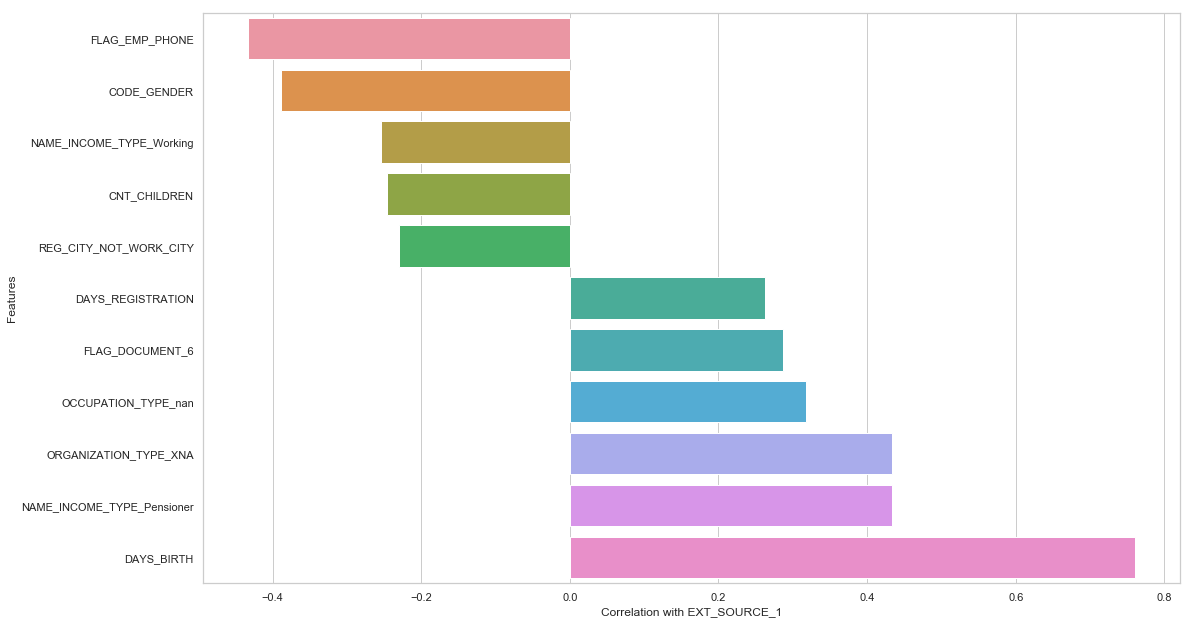

In [12]:
sns.set(style="whitegrid")
sns.barplot(y=corr_names.index, x=corr_names.values)
plt.xlabel("Correlation with EXT_SOURCE_1")
plt.ylabel("Features")

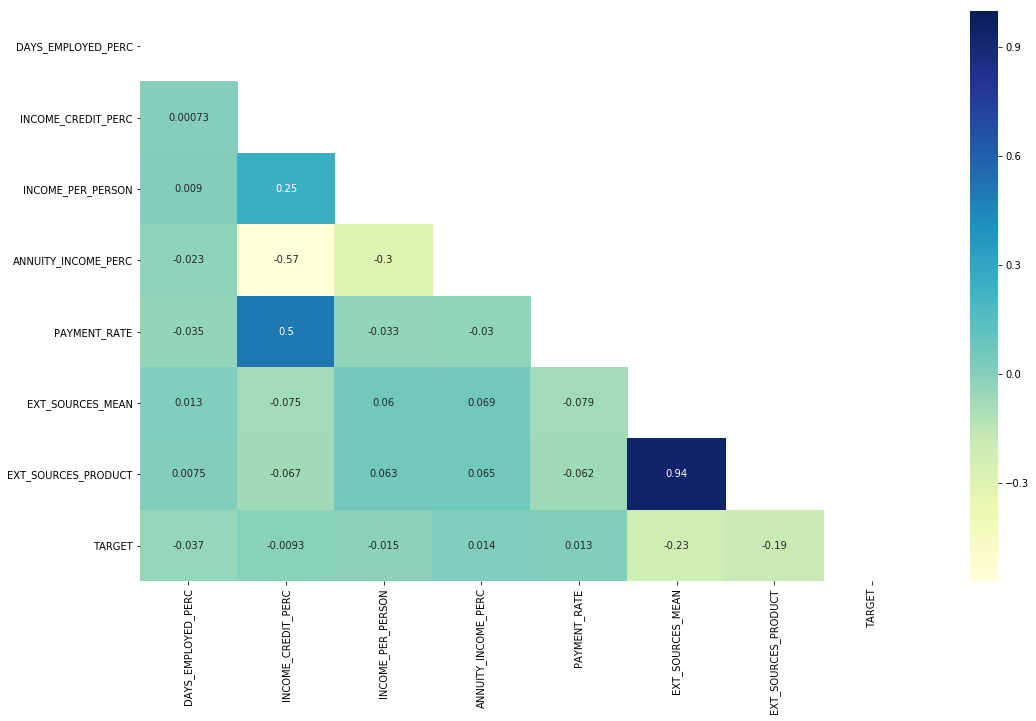

In [22]:
corr = prep_train[domain_features].corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, cmap='YlGnBu', mask=mask, annot=True)


In [7]:
application_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307511 entries, 173139 to 185339
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 288.6+ MB


In [8]:
application_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
173139,300643,0,Cash loans,F,N,N,0,67500.0,706410.0,68944.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
288815,434593,1,Cash loans,M,N,Y,0,342000.0,751500.0,26622.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
237980,375624,0,Revolving loans,F,N,N,1,225000.0,270000.0,13500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
128201,248704,0,Cash loans,F,N,Y,1,148500.0,874152.0,48942.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
186973,316749,0,Cash loans,M,N,Y,0,225000.0,269550.0,24853.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
application_train.TARGET.value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [ ]:
sns.set(style="darkgrid")

In [ ]:
sns.countplot(data=application_train, y="TARGET",orient='h')

In [ ]:
def plot_missing_data_percentage(df, percentage_rate_to_show = 0):
  total = df.isnull().sum().sort_values(ascending=False)
  percent = (df.isnull().sum()/df.isnull().count() * 100).sort_values(ascending=False)

  missing_application_train_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
  missing_application_train_data = missing_application_train_data[missing_application_train_data.Percent >= percentage_rate_to_show]
  sns.barplot(x=missing_application_train_data.Percent, y=missing_application_train_data.index, palette="deep")
  plt.xlabel('Percentage of missing values')

In [ ]:
plot_missing_data_percentage(application_train, 51)

In [ ]:
plot_missing_data_percentage(application_train[application_train.TARGET == 0], 51)

In [ ]:
plot_missing_data_percentage(application_train[application_train.TARGET == 1], 51)

In [ ]:
sns.countplot(data=application_train[application_train.FLAG_OWN_REALTY == 'Y'], y='TARGET')

In [ ]:
sns.countplot(data=application_train[application_train.FLAG_OWN_REALTY == 'N'], y='TARGET')

In [ ]:
application_train[application_train.FLAG_OWN_REALTY == 'N'].TARGET.value_counts()

In [ ]:
application_train[application_train.FLAG_OWN_REALTY == 'N'].shape

In [ ]:
plt.subplot(2,1,1)
plt.title('Distribution of DAYS_EMPLOYEED')
plt.xlabel("DAYS relative to application time")
sns.distplot(application_train.DAYS_EMPLOYED, axlabel='DAYS relative to application time')
plt.subplot(2,1,2)
plt.title('Distribution of DAYS_EMPLOYEED without anomalies')
sns.distplot(application_train[application_train.DAYS_EMPLOYED < 365243].DAYS_EMPLOYED, axlabel='DAYS relative to application time')

In [ ]:
sns.distplot(application_train.DAYS_BIRTH/-365)